# Practice 9 (Neural Networks)

## ANN with Scikit learn

Import:
- from sklearn.neural_network import MLPClassifier

To define an instance:
- ANN = MLPClassifier(hidden_layer_sizes = (5,3), max_iter = 1000)
- hidden_layer_sizes: number of neurons in each layer (length indicates no. of layers)
- Explore other parameters on: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

To train:
- ANN.fit(x_train,y_train)

To predict:
- y_pred = ANN.predict(x_test)

Note: Use MLPRegressor for regression instead of MLPClassifier

## MNIST Digits Classifier

Train an ANN and test it on samples in the test set
- Training set: Images of digits: 0, 1, …, 9 (all 10 classes)
- Scale images down to 8x8 pixels
- Copy code from Lecture 5 practice to start with

Test the performance of an ANN with:
- 1 layer, 10 neurons
- 2 layers, 7 neurons each
- Calculate no. of parameters in each case
- Note: Training leads to a local minimum, you may need to repeat the training multiple times to get good performance
<img align="left" src="DigitsClassifier.JPG">

X_train.shape = (10000, 64), y_train.shape = (10000, 1)
X_test.shape = (8000, 64), y_test.shape = (8000, 1)
Accuracy Score = 0.942125
Confusion Matrix = 
[[783   1   4   0   2   3   3   1   2   1]
 [  0 790   1   0   2   4   0   1   1   1]
 [  5   1 735  15   6   4   3  12  15   4]
 [  1   0  18 726   3  21   1  17  10   3]
 [  1   3   2   1 768   0   4   1   0  20]
 [  6   1   3   8   5 763   1   1   6   6]
 [  9   2   0   0  16   7 763   1   2   0]
 [  2   0   3   5   7   1   0 761   0  21]
 [  5   4  11  13   8  13   5   1 720  20]
 [  5   1   1   4  27   2   1  23   8 728]]


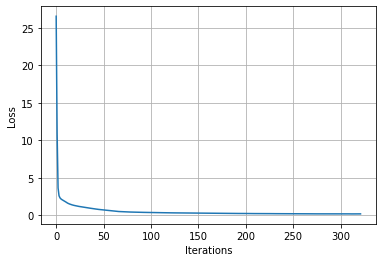

In [6]:
import os # to listdir
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from PIL import Image # python image lib
from sklearn.neural_network import MLPClassifier

folder_training = ['MNIST/training/' + str(i) + '/' for i in range(10)] # creating empty list
folder_testing = ['MNIST/training/' + str(i) + '/' for i in range(10)] # creating empty list
classes = [i for i in range(10)] # empty list

def get_data(folder, im_width, label, n_samples):
    file_names = os.listdir(folder)
    ## np.empty: returns a new array of given shape and type, without initializing entries.
    x = np.empty((n_samples, im_width**2))
    y = np.empty((n_samples, 1))
    for i in range(n_samples):
        path = folder + file_names[i] # generate file path
        im = Image.open(path).convert('L') # open image and convert to grey ('L')
        im = im.resize((im_width, im_width)) # resize as needed
        im_array = asarray(im) # convert image to 2D array
        x[i,:] = im_array.reshape(1,-1) # convert 2D array into one raw vecotr (one sample)
        y[i,0] = classes[label] # generate label
    return x, y

# training data
im_width = 8
P_per_class = 1000;
X_train = np.empty((P_per_class*10, im_width**2))
y_train = np.empty((P_per_class*10, 1))

for i in range(10):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class) # call function, get sample
    X_train[i*P_per_class:(i+1)*P_per_class, :] = x_i # store in X_train
    y_train[i*P_per_class:(i+1)*P_per_class, :] = y_i # store in y_train
    
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')

P_per_class = 800;
X_test = np.empty((P_per_class*10, im_width**2))
y_test = np.empty((P_per_class*10, 1))

for i in range(10):
    x_i, y_i = get_data(folder_testing[i], im_width, i, P_per_class) # call function, get sample
    X_test[i*P_per_class:(i+1)*P_per_class, :] = x_i # store in X_test
    y_test[i*P_per_class:(i+1)*P_per_class, :] = y_i # store in y_test

print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

# train
ANN = MLPClassifier(hidden_layer_sizes = (15), max_iter = 1000) # define an instance with one layer with 10 neuron
ANN.fit(X_train, y_train.ravel()) 

y_pred = ANN.predict(X_test) # predict on test set and evaluate accuracy

print(f'Accuracy Score = {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix = \n{confusion_matrix(y_test, y_pred)}')

plt.plot(ANN.loss_curve_) # plots loss curve (loss vs iterations) if needed
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(1)